In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt
/kaggle/input/movies-genres/movies_genres.csv


In [7]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df=pd.read_csv("/kaggle/input/movies-genres/movies_genres.csv",delimiter ="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117352 entries, 0 to 117351
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        117352 non-null  object
 1   plot         117352 non-null  object
 2   Action       117352 non-null  int64 
 3   Adult        117352 non-null  int64 
 4   Adventure    117352 non-null  int64 
 5   Animation    117352 non-null  int64 
 6   Biography    117352 non-null  int64 
 7   Comedy       117352 non-null  int64 
 8   Crime        117352 non-null  int64 
 9   Documentary  117352 non-null  int64 
 10  Drama        117352 non-null  int64 
 11  Family       117352 non-null  int64 
 12  Fantasy      117352 non-null  int64 
 13  Game-Show    117352 non-null  int64 
 14  History      117352 non-null  int64 
 15  Horror       117352 non-null  int64 
 16  Lifestyle    117352 non-null  int64 
 17  Music        117352 non-null  int64 
 18  Musical      117352 non-null  int64 
 19  My

In [24]:
df_genre=df.drop(['title','plot'],axis=1)
counts=[]
categories=list(df_genre.columns.values)
for i in categories:
    counts.append((i,df_genre[i].sum()))
print(counts)
df_stats=pd.DataFrame(counts,columns=['genre','$movies'])
print(df_stats)

[('Action', 12381), ('Adult', 61), ('Adventure', 10245), ('Animation', 11375), ('Biography', 1385), ('Comedy', 33875), ('Crime', 15133), ('Documentary', 12020), ('Drama', 46017), ('Family', 15442), ('Fantasy', 7103), ('Game-Show', 2048), ('History', 2662), ('Horror', 2571), ('Lifestyle', 0), ('Music', 2841), ('Musical', 596), ('Mystery', 12030), ('News', 3946), ('Reality-TV', 12338), ('Romance', 19242), ('Sci-Fi', 8658), ('Short', 578), ('Sport', 1947), ('Talk-Show', 5254), ('Thriller', 8856), ('War', 1407), ('Western', 2761)]
          genre  $movies
0        Action    12381
1         Adult       61
2     Adventure    10245
3     Animation    11375
4     Biography     1385
5        Comedy    33875
6         Crime    15133
7   Documentary    12020
8         Drama    46017
9        Family    15442
10      Fantasy     7103
11    Game-Show     2048
12      History     2662
13       Horror     2571
14    Lifestyle        0
15        Music     2841
16      Musical      596
17      Mystery  

In [25]:
df.head()

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",All five of these women are independent and s...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",Despite having gone through a life changing p...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
df.tail()

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
117347,"""Ørnen: En krimi-odyssé"" (2004)","Ørnen, an Icelandic inspector in the Danish p...",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
117348,"""Øyevitne"" (2014) {(#1.1)}","Two young kids, Henning and Philip are attrac...",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
117349,"""Øyevitne"" (2014) {(#1.3)}",Someone tries to kill a motorcycle gang membe...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
117350,"""Øyevitne"" (2014) {(#1.5)}",Helen sees her investigation forward signific...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
117351,"""Über Österreich - Juwele des Landes"" (2016)",Georg Riha is and will remain the master of a...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.shape

(117352, 30)

<Axes: xlabel='genre'>

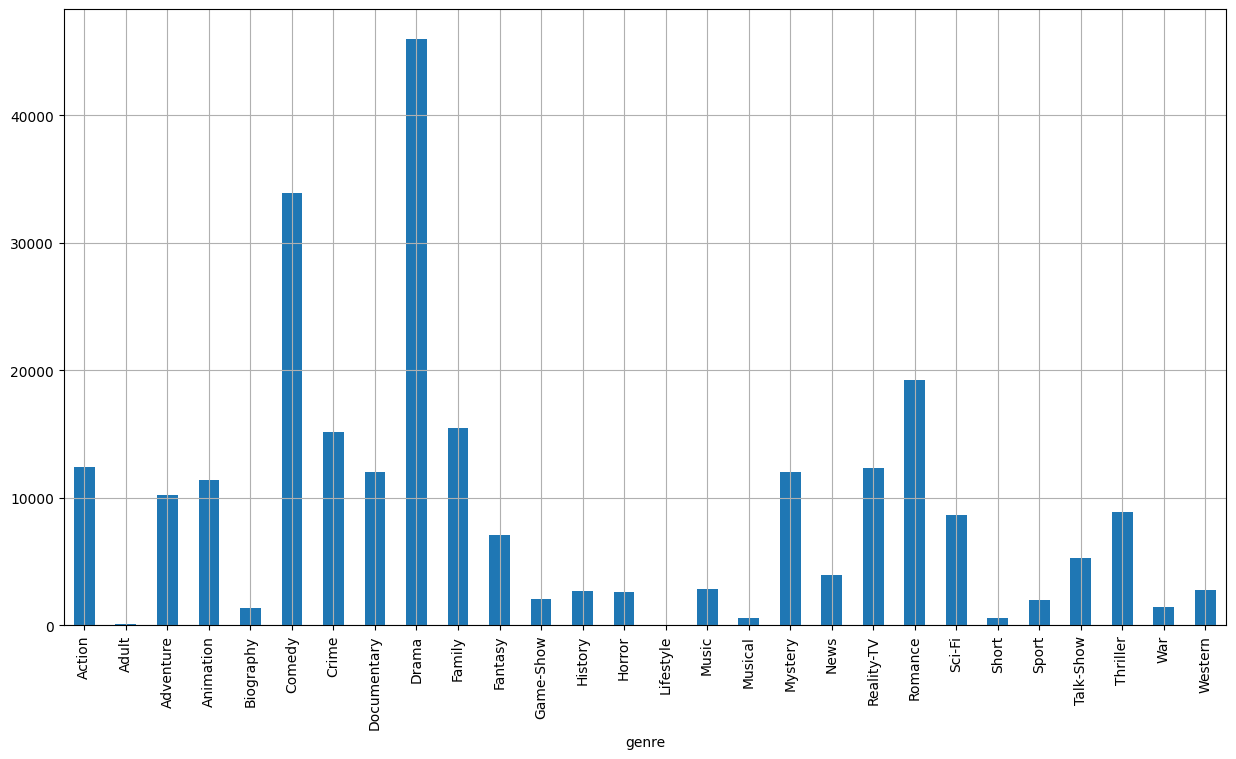

In [29]:
df_stats.plot(x='genre',y='$movies',kind='bar',legend=False,grid='True',figsize=(15,8))

In [30]:
df.drop('Lifestyle', axis=1, inplace=True, errors='ignore')
print(df.columns)

Index(['title', 'plot', 'Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Game-Show', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Talk-Show', 'Thriller', 'War', 'Western'],
      dtype='object')
